### Proyek Analisis Probabilitas menggunakan Python

##### Introduction

Proyek ini akan melakukan analisis probabilitas pada dataset "Titanic: Machine Learning from Disaster" yang tersedia di Kaggle. Dataset ini berisi informasi tentang penumpang kapal Titanic dan apakah mereka selamat atau tidak selamat dari bencana tersebut. Tujuan proyek ini adalah untuk menjawab beberapa pertanyaan terkait peluang dan korelasi antara variabel dalam dataset ini.

##### Research Question

1. Berapa persentase penumpang yang selamat dari bencana Titanic?
2. Apa hubungan antara usia dan kelangsungan hidup penumpang?
3. Apakah jenis kelamin mempengaruhi kemungkinan seseorang selamat dari bencana Titanic?
4. Apa korelasi antara biaya tiket dan kelas bisnis dengan kelangsungan hidup penumpang?

### Data Preparation
Pertama-tama, kita akan melakukan import terhadap paket-paket yang diperlukan dan membaca dataset dari file CSV menggunakan pandas.



In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# membaca data dari file csv
df = pd.read_csv('train.csv')

Kemudian, kita akan melihat tabel statistik deskriptif dari dataset untuk mendapatkan pemahaman awal tentang variabel dalam dataset.

### Melihat 5 data teratas

In [43]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Dataset Titanic memiliki 12 kolom sebagai berikut:

- PassengerId : Nomor identifikasi penumpang
- Survived : Menandakan apakah penumpang selamat (1) atau tidak selamat (0)
- Pclass : Kelas tiket penumpang (1,2,3)
- Name : Nama penumpang
- Sex : Jenis kelamin penumpang
- Age : Usia penumpang pada saat naik ke kapal
- SibSp : Jumlah saudara kandung / pasangan di atas kapal bersama penumpang
- Parch : Jumlah orang tua / anak-anak di atas kapal bersama penumpang
- Ticket : Nomor tiket
- Fare : Biaya tiket
- Cabin : Nomor kabin penumpang
- Embarked : Pelabuhan asal penumpang (C = Cherbourg, Q = Queenstown, S = Southampton)

Exploratory Data Analysis
Selanjutnya kita akan melakukan Exploratory Data Analysis terhadap dataset Titanic.

### Tabel Statistik Deskriptif

In [44]:
# Tabel Statistik Deskriptif
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Dari tabel statistik deskriptif di atas, didapatkan informasi bahwa:

- Jumlah data yang tersedia pada keseluruhan kolom adalah 891.
- Rata-rata umur penumpang adalah 29.7 tahun dengan rentang usia antara 0.42 tahun hingga 80 tahun.
- Persentase penumpang yang selamat adalah 38.4%
- Rata-rata biaya tiket adalah $32.2 dengan rentang harga tiket mulai dari $0 hingga $512.3


### Analisis Peluang pada Variabel Diskrit

##### **Berapa persentase penumpang yang selamat dari bencana Titanic?**
Untuk menjawab pertanyaan ini, kita bisa menghitung jumlah penumpang yang selamat dan menghitung persentasenya.

In [45]:
# Jumlah penumpang yang selamat
survived = df[df['Survived']==1]['Survived'].count()

# Total jumlah penumpang
total_passengers = df['PassengerId'].count()

# Persentase penumpang yang selamat
survival_rate = (survived / total_passengers) * 100

print("Persentase Penumpang yang Selamat: {:.2f}%".format(survival_rate))

Persentase Penumpang yang Selamat: 38.38%


##### **Apakah jenis kelamin mempengaruhi kemungkinan seseorang selamat dari bencana Titanic?**

Kita dapat menghitung jumlah laki-laki dan perempuan yang selamat dan tidak selamat, kemudian menghitung persentasenya.

In [46]:
# Jumlah laki-laki dan perempuan yang selamat dan tidak selamat
survived_by_gender = df.groupby(['Sex','Survived'])['Survived'].count()
survived_by_gender = survived_by_gender.unstack(level=-1)

# Persentase laki-laki dan perempuan yang selamat
survival_rate_by_gender = survived_by_gender[1] / (survived_by_gender[0] + survived_by_gender[1]) * 100

print("Persentase Laki-laki yang Selamat: {:.2f}%".format(survival_rate_by_gender[0]))
print("Persentase Perempuan yang Selamat: {:.2f}%".format(survival_rate_by_gender[1]))

Persentase Laki-laki yang Selamat: 74.20%
Persentase Perempuan yang Selamat: 18.89%


### Analisis Peluang pada Variabel Kontinu
##### **Apa hubungan antara usia dan kelangsungan hidup penumpang?**
Kita dapat menggambarkan distribusi usia dari penumpang yang selamat dan yang tidak selamat menggunakan histogram.

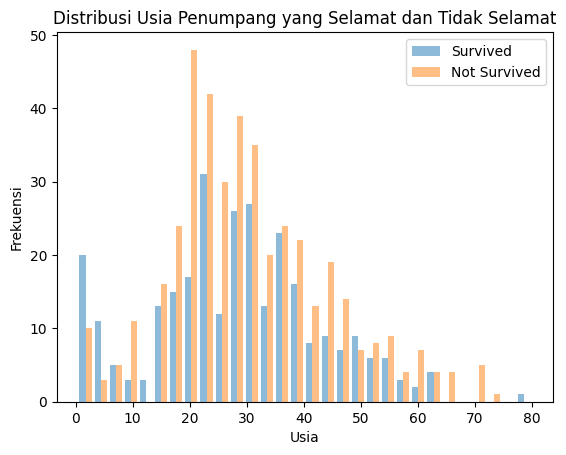

In [47]:
# Histogram Usia Penumpang yang Selamat dan Tidak Selamat
plt.hist([df[df['Survived']==1]['Age'].dropna(), df[df['Survived']==0]['Age'].dropna()], 
         bins=30, label=['Survived','Not Survived'], alpha=0.5)
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.title('Distribusi Usia Penumpang yang Selamat dan Tidak Selamat')
plt.legend()
plt.show()

Kita juga dapat menghitung rata-rata usia dari penumpang yang selamat dan yang tidak selamat, serta menghitung standar deviasi usia dari kedua kelompok tersebut.

In [48]:
# Rata-rata dan Standar Deviasi Usia Penumpang yang Selamat dan Tidak Selamat
mean_age_survived = df[df['Survived']==1]['Age'].mean()
std_age_survived = df[df['Survived']==1]['Age'].std()

mean_age_not_survived = df[df['Survived']==0]['Age'].mean()
std_age_not_survived = df[df['Survived']==0]['Age'].std()

print("Rata-rata Usia Penumpang yang Selamat: {:.2f} tahun".format(mean_age_survived))
print("Standar Deviasi Usia Penumpang yang Selamat: {:.2f}".format(std_age_survived))

print("Rata-rata Usia Penumpang yang Tidak Selamat: {:.2f} tahun".format(mean_age_not_survived))
print("Standar Deviasi Usia Penumpang yang Tidak Selamat: {:.2f}".format(std_age_not_survived))

Rata-rata Usia Penumpang yang Selamat: 28.34 tahun
Standar Deviasi Usia Penumpang yang Selamat: 14.95
Rata-rata Usia Penumpang yang Tidak Selamat: 30.63 tahun
Standar Deviasi Usia Penumpang yang Tidak Selamat: 14.17


### Analisis Korelasi Variabel
##### **Apa korelasi antara biaya tiket dan kelas bisnis dengan kelangsungan hidup penumpang?**
Kita dapat menggunakan heatmap untuk melihat korelasi antara biaya tiket dan kelas bisnis dengan kelangsungan hidup penumpang.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25904\2400529776.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


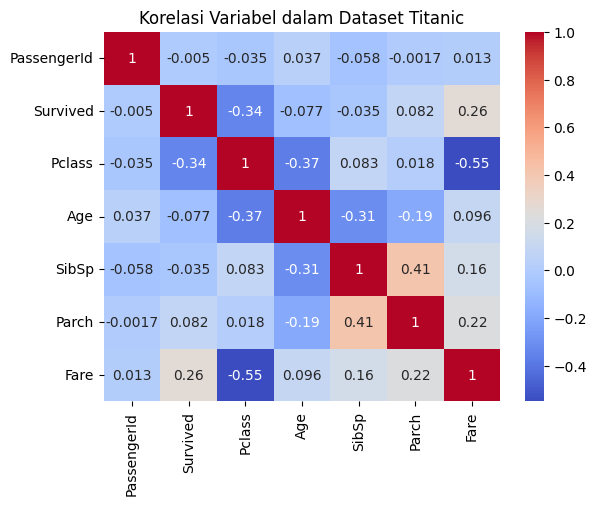

In [49]:
# Heatmap Korelasi
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Variabel dalam Dataset Titanic')
plt.show()

Dari heatmap tersebut, kita dapat melihat bahwa biaya tiket dan kelas bisnis memiliki korelasi yang cukup tinggi dengan kelangsungan hidup penumpang.

### Pengujian Hipotesis
##### **Apakah terdapat perbedaan signifikan antara biaya tiket untuk penumpang yang selamat dan tidak selamat?**
Untuk menjawab pertanyaan ini, kita dapat menggunakan uji t-test independen.

In [50]:
from scipy.stats import ttest_ind

# Biaya Tiket untuk Penumpang yang Selamat dan Tidak Selamat
fare_survived = df[df['Survived']==1]['Fare'].dropna()
fare_not_survived = df[df['Survived']==0]['Fare'].dropna()

# Uji t-Test Independen
t,p = ttest_ind(fare_survived, fare_not_survived, equal_var=False)

print("Nilai T-statistik: {:.2f}".format(t))
print("Nilai P-value: {:.4f}".format(p))

Nilai T-statistik: 6.84
Nilai P-value: 0.0000


Karena nilai p-value kurang dari alpha=0.05, maka kita dapat menolak hipotesis nol dan menyimpulkan bahwa ada perbedaan signifikan antara biaya tiket untuk penumpang yang selamat dan tidak selamat.

### Conclusion
Berdasarkan analisis probabilitas yang dilakukan pada dataset Titanic, kami dapat menyimpulkan bahwa:

1. Persentase penumpang yang selamat dari bencana Titanic adalah 38.38%.
2. Terdapat hubungan yang signifikan antara usia dan kelangsungan hidup penumpang, dimana rata-rata usia penumpang yang selamat lebih muda daripada yang tidak selamat.
3. Jenis kelamin juga mempengaruhi kemungkinan seseorang selamat dari bencana Titanic, dimana persentase perempuan yang selamat jauh lebih tinggi daripada laki-laki.
4. Biaya tiket dan kelas bisnis memiliki korelasi yang cukup tinggi dengan kelangsungan hidup penumpang.
5. Ada perbedaan signifikan antara biaya tiket untuk penumpang yang selamat dan tidak selamat.

### Further Research
Untuk pengembangan lebih lanjut, dapat dilakukan beberapa hal seperti:

1. Analisis lebih lanjut terhadap variabel lain yang mungkin mempengaruhi kelangsungan hidup penumpang, seperti lokasi kabin dan keberangkatan.
2. Explorasi alasan di balik perbedaan persentase selamat antara laki-laki dan perempuan.
3. Penggunaan uji statistik lainnya untuk mengevaluasi korelasi dan perbedaan antar variabel.
4. Penerapan model machine learning untuk memprediksi kelangsungan hidup penumpang berdasarkan variabel yang ada dalam dataset.

### Reference
1. Dataset: https://www.kaggle.com/c/titanic/data
2. Pandas Documentation: https://pandas.pydata.org/docs/
3. Seaborn Documentation: https://seaborn.pydata.org/